<a href="https://colab.research.google.com/github/IshwaryaKeerthivasan/SVM/blob/main/Linear_vs_Kernal_SVM_on_a_random_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

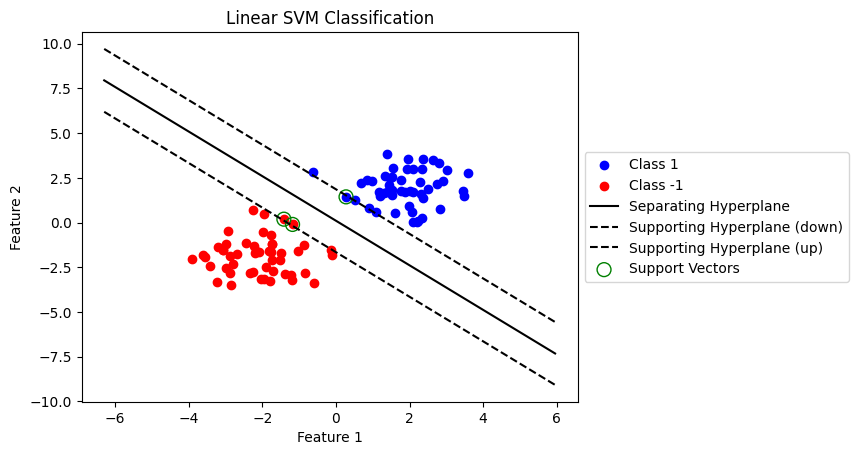

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate a sample dataset
np.random.seed(42)
class_1 = np.random.randn(50, 2) + [2, 2]  # Class 1 points centered around [2, 2]
class_minus_1 = np.random.randn(50, 2) + [-2, -2]  # Class -1 points centered around [-2, -2]

# Concatenate data and labels
X = np.vstack((class_1, class_minus_1))
y = np.hstack((np.ones(50), -1 * np.ones(50)))

# Train a linear SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Plot the data points
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
plt.scatter(class_minus_1[:, 0], class_minus_1[:, 1], color='red', label='Class -1')

# Get the coefficients and intercept of the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]

# Calculate slope and intercept of the separating hyperplane
slope = -w[0] / w[1]
intercept = -b / w[1]

# Define extended range of x values for the plot
x_min, x_max = plt.xlim()
x_vals = np.linspace(x_min - 2, x_max + 2, 100)
# Calculate y-values for the separating hyperplane
y_vals = slope * x_vals + intercept

# Plot the separating hyperplane
plt.plot(x_vals, y_vals, 'k', label='Separating Hyperplane')

# Calculate and plot the supporting hyperplanes
margin = 1 / np.linalg.norm(w)
y_vals_down = y_vals - margin / w[1]
y_vals_up = y_vals + margin / w[1]
# Plot supporting hyperplanes
plt.plot(x_vals, y_vals_down, 'k--', label='Supporting Hyperplane (down)')
plt.plot(x_vals, y_vals_up, 'k--', label='Supporting Hyperplane (up)')

# Highlight support vectors
support_vectors = clf.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='green', label='Support Vectors')

# Add axis labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Classification')

# Display a legend outside the graph area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

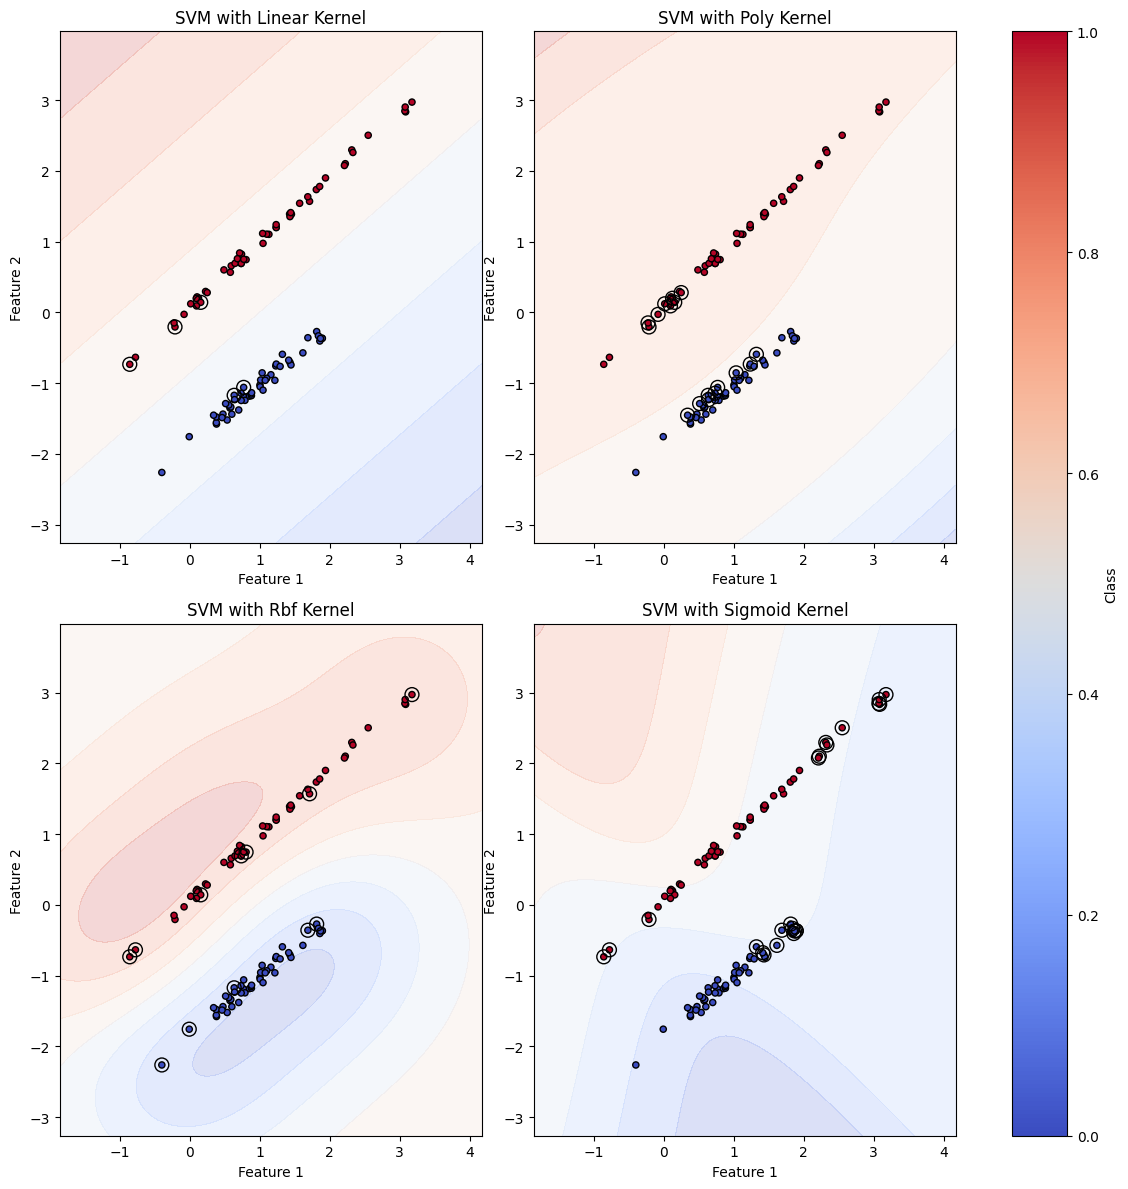

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay

# Generate a sample dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Define different kernel types to use
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create a figure with subplots for each kernel type
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Train and plot SVM models for each kernel type
for idx, kernel in enumerate(kernels):
    ax = axes.flatten()[idx]
    clf = svm.SVC(kernel=kernel, gamma='scale')
    clf.fit(X, y)

    # Plot decision boundary using DecisionBoundaryDisplay
    DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax, alpha=0.2, cmap=plt.cm.coolwarm)

    # Plot the data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=20)

    # Set title and labels
    ax.set_title(f'SVM with {kernel.capitalize()} Kernel')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    # Plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Adjust layout for better spacing
plt.tight_layout()

# Add a colorbar for the plot
cbar = fig.colorbar(scatter, ax=axes.ravel().tolist())
cbar.set_label('Class')

# Display the plot
plt.show()